# Could we use the information in the agent comments to improve AVM? 
# Could we use it to estimate incremental prices associated with renovations or new features?

In [54]:
import pandas as pd
from importlib import reload
import numpy as np
import seaborn as sns

### 1. Read GA sales with agent comments

In [6]:
#str_state = 'GA'
#file = 'agent_comments_sales_'+str_state
#df_sales = pd.read_feather(file+'.fea')

In [82]:
str_state = 'GA'
file = 'agent_comments_sales_'+str_state
#file = 'agent_comments_testdf'
#READ THE SALES DATA - STATE
df_sales = pd.read_feather(file + '_sentencecomposition.fea')
#df_sales = pd.read_feather(file + '_processed.fea')

In [7]:
print('Number of entries:', len(df_sales))

Number of entries: 636149


In [8]:
df_sales.head(5)

,index,listingid,asgpropid,qtr,tax_year,cbsa_div,cbsa,state,Transdate,Transprice,...,fips_code,census_tract,zip,effective_year_built,story,ListingPrice,publicremarks,avmValue,avmerror,rentsale
0,128,226661582,27649366.0,202008,2020.0,23580,23580,GA,20200811,359000.0,...,13139,13139001608,30517,2015.0,1.5,375000.0,Welcome to this gorgeous basement home in the ...,405972.57,-0.130843,S
1,190,226786904,27628370.0,202008,2020.0,29300,29300,GA,20200925,265000.0,...,13285,13285960300,30240,1995.0,1.0,279900.0,LOCATION LOCATION LOCATION!!!! JUST STEPS FROM...,244827.67,0.076122,S
2,232,226142320,27963359.0,202005,2020.0,27600,27600,GA,20200624,239900.0,...,13157,13157010701,30549,2003.0,1.0,239900.0,Spacious stepless 4-sides Brick Ranch with a R...,229674.21,0.042625,S
3,308,226738459,27516267.0,202008,2020.0,29300,29300,GA,20200713,130900.0,...,13285,13285960202,30240,2010.0,1.0,129900.0,"New carpet , new vinyl, new interior paint, ne...",143607.40,-0.097077,S
4,467,226850183,27791872.0,202008,2020.0,23580,23580,GA,20200702,406000.0,...,13139,13139001608,30548,2013.0,2.0,415000.0,Beautiful John Wieland Home in highly sought a...,408971.22,-0.007318,S


In [96]:
df_sales.columns

Index(['index', 'listingid', 'asgpropid', 'qtr', 'tax_year', 'cbsa_div',
       'cbsa', 'state', 'Transdate', 'Transprice', 'bedrooms', 'total_value',
       'cj_living_area', 'basement', 'has_pool', 'parking', 'is_poor',
       'is_good', 'HAS_VIEW', 'has_golf', 'has_water', 'has_woods', 'has_hill',
       'fips_code', 'census_tract', 'zip', 'effective_year_built', 'story',
       'ListingPrice', 'publicremarks', 'avmValue', 'avmerror', 'rentsale',
       'publicremarks_prepared', 'publicremarks_prepared_spellcheck',
       'publicremarks_prepared_unicode', 'clean_publicremarks',
       'clean_publicremarks_additional_words', 'clean_publicremarks_nopunct',
       'clean_publicremarks_nopunct_additional_words',
       'clean_publicremarks_stemmed',
       'clean_publicremarks_stemmed_additional_words',
       'clean_publicremarks_lemmatized',
       'clean_publicremarks_lemmatized_additional_words',
       'publicremarks_nltkpolarity', 'clean_publicremarks_nltkpolarity',
       'clean_

### 2. Select house

In [10]:
house = 500 

In [11]:
df_sales.publicremarks[house]

'OPPORTUNITY IS KNOCKING WILL YOU ANSWER??? RENOVATED HOME IN THE SOUGHT AFTER FAMILY ORIENTED STURBRIDGE COMMUNITY JUST A STONES THROW FROM THE PRISTINE SHORES OF WEST POINT LAKE & SUNNY POINT ACCESS & PICNIC AREA & MINUTES TO EVERYTHING LAGRANGE HAS TO OFFER! SPACIOUS FLOOR PLAN LOADED WITH AMENITIES, UPDATED CHEFS KITCHEN W NEW CABINETRY , STONE TOPS & STAINLESS APPLIANCE PACKAGE & ADJOINING FORMAL DINNING ROOM PERFECT FOR LARGE FAMILY CELEBRATIONS, BEAUTIFUL NEWLY INSTALLED LUXURY VINYL PLANK FLOORING IN COMMON AREAS, UPDATED HVAC & ALL NEW WINDOWS THROUGHOUT THE HOME, GENEROUS MASTER SUITE W UPDATED BATH & ABUNDANCE OF CLOSET SPACE, GIGANTIC BONUS ROOM OVER GARAGE PERFECT AS PLAYROOM/OFFICE/MAN CAVE THIS IS A MUST SEE IN THE HILL CREST SCHOOL ZONE!!!!'

### 3. Preprocessing

In [12]:
# Library for PANDAS dataframes and single entries

from nlp_pandas_functions import nlp_pandas_functions
reload(nlp_pandas_functions)
dir(nlp_pandas_functions)

2022-02-18 07:16:58,576 loading file /home/cdsw/.flair/models/sentiment-en-mix-distillbert_4.pt


['PorterStemmer',
 'SnowballStemmer',
 'TextBlob',
 'WordNetLemmatizer',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'define_stop_words',
 'df_column_prepare',
 'df_column_remove_punctuation',
 'df_column_remove_unicode',
 'df_column_stemmer',
 'df_lambda_lemmatizer',
 'df_lambda_remove_punctuation',
 'df_lambda_remove_stop_words',
 'df_lambda_remove_unicode',
 'df_lambda_stemmer',
 'df_lambda_to_lowercase',
 'df_spell_check',
 'nltk',
 're',
 'single_entry_lambda_stemmer',
 'single_entry_lemmatizer',
 'single_entry_prepare',
 'single_entry_remove_punctuation',
 'single_entry_remove_stop_words',
 'single_entry_remove_unicode',
 'single_entry_spell_check',
 'string',
 'word_tokenize']

#### 3.1 Basic cleaning

In [13]:
basic_cleaning = nlp_pandas_functions.single_entry_prepare(df_sales.publicremarks[house])
print(basic_cleaning)

opportunity is knocking will you answer??? renovated home in the sought after family oriented sturbridge community just a stones throw from the pristine shores of west point lake & sunny point access & picnic area & minutes to everything lagrange has to offer! spacious floor plan loaded with amenities, updated chefs kitchen w new cabinetry , stone tops & stainless appliance package & adjoining formal dinning room perfect for large family celebrations, beautiful newly installed luxury vinyl plank flooring in common areas, updated hvac & all new windows throughout the home, generous master suite w updated bath & abundance of closet space, gigantic bonus room over garage perfect as playroom/office/man cave this is a must see in the hill crest school zone!!!!


In [14]:
#Spell check is RISKY....

#nlp_pandas_functions.single_entry_spell_check(nlp_pandas_functions.
#                                              single_entry_prepare(df_sales.publicremarks[house]))

#### 3.2 Unicode 

In [15]:
no_unicode = nlp_pandas_functions.single_entry_remove_unicode(basic_cleaning)
print(no_unicode)

opportunity is knocking will you answer??? renovated home in the sought after family oriented sturbridge community just a stones throw from the pristine shores of west point lake & sunny point access & picnic area & minutes to everything lagrange has to offer! spacious floor plan loaded with amenities, updated chefs kitchen w new cabinetry , stone tops & stainless appliance package & adjoining formal dinning room perfect for large family celebrations, beautiful newly installed luxury vinyl plank flooring in common areas, updated hvac & all new windows throughout the home, generous master suite w updated bath & abundance of closet space, gigantic bonus room over garage perfect as playroom/office/man cave this is a must see in the hill crest school zone!!!!


#### 3.3 Punctuation

In [16]:
no_punctuation = nlp_pandas_functions.single_entry_remove_punctuation(no_unicode)
print(no_punctuation)

opportunity is knocking will you answer renovated home in the sought after family oriented sturbridge community just a stones throw from the pristine shores of west point lake  sunny point access  picnic area  minutes to everything lagrange has to offer spacious floor plan loaded with amenities updated chefs kitchen w new cabinetry  stone tops  stainless appliance package  adjoining formal dinning room perfect for large family celebrations beautiful newly installed luxury vinyl plank flooring in common areas updated hvac  all new windows throughout the home generous master suite w updated bath  abundance of closet space gigantic bonus room over garage perfect as playroomofficeman cave this is a must see in the hill crest school zone


#### 3.4 Remove Stopwords

In [17]:
stop_words_01 = nlp_pandas_functions.define_stop_words([])
no_stop_words_01 = nlp_pandas_functions.single_entry_remove_stop_words(no_unicode, stop_words_01)
print(no_stop_words_01)

opportunity knocking answer??? renovated home sought family oriented sturbridge community stones throw pristine shores west point lake & sunny point access & picnic area & minutes everything lagrange offer! spacious floor plan loaded amenities, updated chefs kitchen w new cabinetry , stone tops & stainless appliance package & adjoining formal dinning room perfect large family celebrations, beautiful newly installed luxury vinyl plank flooring common areas, updated hvac & new windows throughout home, generous master suite w updated bath & abundance closet space, gigantic bonus room garage perfect playroom/office/man cave must see hill crest school zone!!!!


In [18]:
stop_words_to_add = ['able', 'about', 'above', 'abst', 'accordance', 'according', 'accordingly', 'across', 'act', 'actually', 'added', 'adj', 'affected', 'affecting',
                    'affects', 'after', 'afterwards', 'again', 'against', 'ah', 'all', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'am', 'among',
                   'amongst', 'an', 'and', 'announce', 'another', 'any', 'anybody', 'anyhow', 'anymore', 'anyone', 'anything', 'anyway', 'anyways', 'anywhere', 'apparently',
                   'approximately', 'are', 'aren', 'arent', 'arise', 'around', 'as', 'aside', 'ask', 'asking', 'at', 'auth', 'away', 'awfully', 'back',
                   'be', 'became', 'because', 'become', 'becomes', 'becoming', 'been', 'before', 'beforehand', 'begin', 'beginning', 'beginnings', 'begins', 'behind',
                   'being', 'believe', 'below', 'beside', 'besides', 'between', 'beyond', 'biol', 'both', 'brief', 'briefly', 'but', 'by', 'c', 'ca', 'came', 'can',
                   'cannot', 'can''t', 'cause', 'causes', 'certain', 'certainly', 'co', 'com', 'come', 'comes', 'contain', 'containing', 'contains', 'could', 'couldnt',
                   'date', 'did', 'didn''t', 'different', 'do', 'does', 'doesn''t', 'doing', 'done', 'don''t', 'down', 'downwards', 'due', 'during', 'each', 'ed', 'edu',
                   'effect', 'eg', 'eight', 'eighty', 'either', 'else', 'elsewhere', 'end', 'ending', 'enough', 'especially', 'et', 'et-al', 'etc', 'even', 'ever', 'every',
                   'everybody', 'everyone', 'everything', 'everywhere', 'except', 'far', 'few', 'ff', 'fifth', 'first', 'five', 'followed', 'following', 'follows',
                   'for', 'former', 'formerly', 'forth', 'found', 'four', 'from', 'further', 'furthermore', 'gave', 'get', 'gets', 'getting', 'give', 'given', 'gives',
                   'giving', 'go', 'goes', 'gone', 'got', 'gotten', 'had', 'happens', 'hardly', 'has', 'hasn''t', 'have', 'haven''t', 'having', 'he', 'hed', 'hence', 'her',
                   'here', 'hereafter', 'hereby', 'herein', 'heres', 'hereupon', 'hers', 'herself', 'hes', 'hi', 'hid', 'him', 'himself', 'his', 'hither', 'home', 'how',
                   'howbeit', 'however', 'hundred', 'id', 'ie', 'if', 'im', 'importance', 'important', 'in', 'inc', 'indeed', 'index',
                   'information', 'instead', 'into', 'invention', 'inward', 'is', 'isn''t', 'it', 'itd', 'it''ll', 'its', 'itself', 'just', 'keep', 'keeps', 'kept',
                   'kg', 'km', 'know', 'known', 'knows', 'largely', 'last', 'lately', 'later', 'latter', 'latterly', 'least', 'less', 'lest', 'let', 'lets', 'like', 'liked',
                   'likely', 'line', 'little', 'look', 'looking', 'looks', 'ltd', 'made', 'mainly', 'make', 'makes', 'many', 'may', 'maybe', 'me', 'mean', 'means', 'meantime',
                   'meanwhile', 'merely', 'mg', 'might', 'million', 'miss', 'ml', 'more', 'moreover', 'most', 'mostly', 'much', 'mug', 'my', 'myself', 'name', 'namely', 'nay',
                   'near', 'nearly', 'necessarily', 'neither', 'never', 'nevertheless', 'new', 'next', 'nine', 'ninety', 'no', 'nobody', 'non',
                   'none', 'nonetheless', 'noone', 'nor', 'normally', 'nos', 'not', 'noted', 'nothing', 'now', 'nowhere', 'obtain', 'obtained', 'obviously', 'of', 'off', 'often',
                   'oh', 'ok', 'okay', 'old', 'omitted', 'on', 'once', 'one', 'ones', 'only', 'onto', 'or', 'ord', 'other', 'others', 'otherwise', 'ought', 'our', 'ours', 'ourselves',
                   'out', 'outside', 'over', 'overall', 'owing', 'own', 'page', 'pages', 'part', 'particular', 'particularly', 'past', 'per', 'perhaps', 'placed', 'please', 'plus',
                   'poorly', 'possible', 'possibly', 'potentially', 'predominantly', 'present', 'previously', 'primarily', 'probably', 'promptly', 'proud', 'provides', 'put', 'que',
                   'quickly', 'quite', 'qv', 'ran', 'rather', 'rd', 're', 'readily', 'really', 'recent', 'recently', 'ref', 'refs', 'regarding', 'regardless', 'regards', 'related',
                   'relatively', 'research', 'respectively', 'resulted', 'resulting', 'results', 'right', 'run', 'said', 'same', 'saw', 'say', 'saying', 'says', 'sec', 'section',
                   'see', 'seeing', 'seem', 'seemed', 'seeming', 'seems', 'seen', 'self', 'selves', 'sent', 'seven', 'several', 'shall', 'she', 'shed', 'she''ll', 'shes', 'should',
                   'shouldn''t', 'show', 'showed', 'shown', 'showns', 'shows', 'significant', 'significantly', 'similar', 'similarly', 'since', 'six', 'slightly', 'so', 'some',
                   'somebody', 'somehow', 'someone', 'somethan', 'something', 'sometime', 'sometimes', 'somewhat', 'somewhere', 'soon', 'sorry', 'specifically', 'specified', 'specify',
                   'specifying', 'still', 'stop', 'strongly', 'sub', 'successfully', 'such', 'sufficiently', 'suggest', 'sup', 'sure', 'take', 'taken', 'taking',
                   'tell', 'tends', 'th', 'than', 'thank', 'thanks', 'thanx', 'that', 'that''ll', 'thats', 'that''ve', 'the', 'their', 'theirs', 'them', 'themselves', 'then',
                   'thence', 'there', 'thereafter', 'thereby', 'thered', 'therefore', 'therein', 'there''ll', 'thereof', 'therere', 'theres', 'thereto', 'thereupon', 'there''ve',
                   'these', 'they', 'theyd', 'they''ll', 'theyre', 'they''ve', 'think', 'this', 'those', 'thou', 'though', 'thoughh', 'thousand', 'throug', 'through',
                   'thru', 'thus', 'til', 'tip', 'to', 'together', 'too', 'took', 'toward', 'towards', 'tried', 'tries', 'truly', 'try', 'trying', 'ts', 'twice', 'two', 'under',
                   'unfortunately', 'unless', 'unlike', 'unlikely', 'until', 'unto', 'up', 'upon', 'ups', 'us', 'use', 'used', 'useful', 'usefully', 'usefulness', 'uses', 'using',
                   'usually', 'various', 'very', 'via', 'viz', 'vol', 'vols', 'vs', 'want', 'wants', 'was', 'wasnt', 'way', 'we', 'wed', 'welcome', 'we''ll', 'went', 'were',
                   'werent', 'we''ve', 'what', 'whatever', 'what''ll', 'whats', 'when', 'whence', 'whenever', 'where', 'whereafter', 'whereas', 'whereby', 'wherein', 'wheres',
                   'whereupon', 'wherever', 'whether', 'which', 'while', 'whim', 'whither', 'who', 'whod', 'whoever', 'whole', 'who''ll', 'whom', 'whomever', 'whos', 'whose',
                   'why', 'widely', 'willing', 'wish', 'with', 'within', 'without', 'wont', 'words', 'world', 'would', 'wouldnt', 'www','yes', 'yet', 'you', 'youd', 'you''ll',
                   'your', 'youre', 'yours', 'yourself', 'yourselves', 'you''ve', 'zero']

stop_words_02 = nlp_pandas_functions.define_stop_words(stop_words_to_add)
no_stop_words_02 = nlp_pandas_functions.single_entry_remove_stop_words(no_unicode, stop_words_02)
print(no_stop_words_02)

opportunity knocking answer??? renovated sought family oriented sturbridge community stones throw pristine shores west point lake & sunny point access & picnic area & minutes lagrange offer! spacious floor plan loaded amenities, updated chefs kitchen w cabinetry , stone tops & stainless appliance package & adjoining formal dinning room perfect large family celebrations, beautiful newly installed luxury vinyl plank flooring common areas, updated hvac & windows throughout home, generous master suite w updated bath & abundance closet space, gigantic bonus room garage perfect playroom/office/man cave must hill crest school zone!!!!


#### 3.5 Stemmer

Stemming is the process of reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words known as a lemma.

In [19]:
stemmed = nlp_pandas_functions.single_entry_lambda_stemmer(no_stop_words_02)
print(stemmed)

opportun knock answer??? renov sought famili orient sturbridg commun stone throw pristin shore west point lake & sunni point access & picnic area & minut lagrang offer! spaciou floor plan load amenities, updat chef kitchen w cabinetri , stone top & stainless applianc packag & adjoin formal din room perfect larg famili celebrations, beauti newli instal luxuri vinyl plank floor common areas, updat hvac & window throughout home, gener master suit w updat bath & abund closet space, gigant bonu room garag perfect playroom/office/man cave must hill crest school zone!!!!


#### 3.6 Lemmatizer

Lemmatization in linguistics is the process of grouping together the inflected forms of a word so they can be analysed as a single item, identified by the word's lemma, or dictionary form

In [20]:
lemmatized = nlp_pandas_functions.single_entry_lemmatizer(no_stop_words_02)
print(lemmatized)

opportunity knocking answer??? renovated sought family oriented sturbridge community stone throw pristine shore west point lake & sunny point access & picnic area & minute lagrange offer! spacious floor plan loaded amenities, updated chef kitchen w cabinetry , stone top & stainless appliance package & adjoining formal dinning room perfect large family celebrations, beautiful newly installed luxury vinyl plank flooring common areas, updated hvac & window throughout home, generous master suite w updated bath & abundance closet space, gigantic bonus room garage perfect playroom/office/man cave must hill crest school zone!!!!


### 4. Sentiment analysis (pre-trained - supervised)

In [21]:
from nlp_pandas_functions import sentiment_analysis
reload(sentiment_analysis)

2022-02-18 07:17:04,902 loading file /home/cdsw/.flair/models/sentiment-en-mix-distillbert_4.pt


<module 'nlp_pandas_functions.sentiment_analysis' from '/home/cdsw/nlp_pandas_functions/sentiment_analysis.py'>

#### 4.1 NLTK

In [22]:
nltk_sentiment = sentiment_analysis.single_entry_nltk_polarity_score(no_stop_words_02)
print(nltk_sentiment)

{'neg': 0.0, 'neu': 0.715, 'pos': 0.285, 'compound': 0.983}


#### 4.2 VADER

In [23]:
vader_sentiment = sentiment_analysis.single_entry_vader_polarity(no_stop_words_02)
print(vader_sentiment)

{'neg': 0.0, 'neu': 0.741, 'pos': 0.259, 'compound': 0.983}


#### 4.3 TextBlob 

In [24]:
textblob_sentiment = sentiment_analysis.single_entry_textblob_polarity(no_stop_words_02)
print(textblob_sentiment)

Sentiment(polarity=0.4429499072356215, subjectivity=0.6547309833024119)


### 5. Embedding (pre-trained) -A-

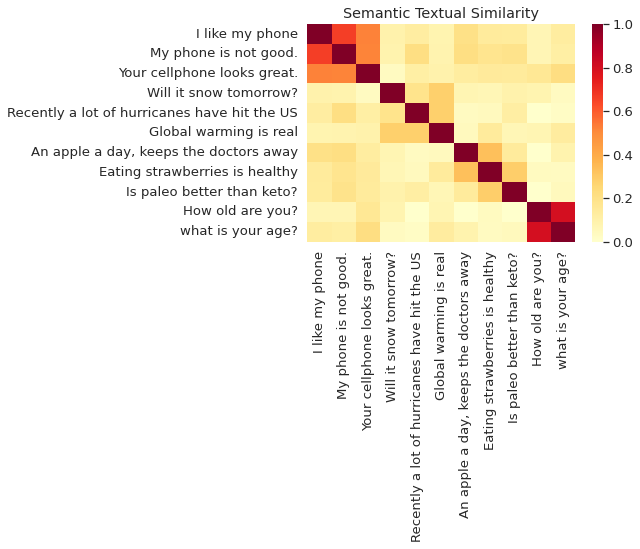

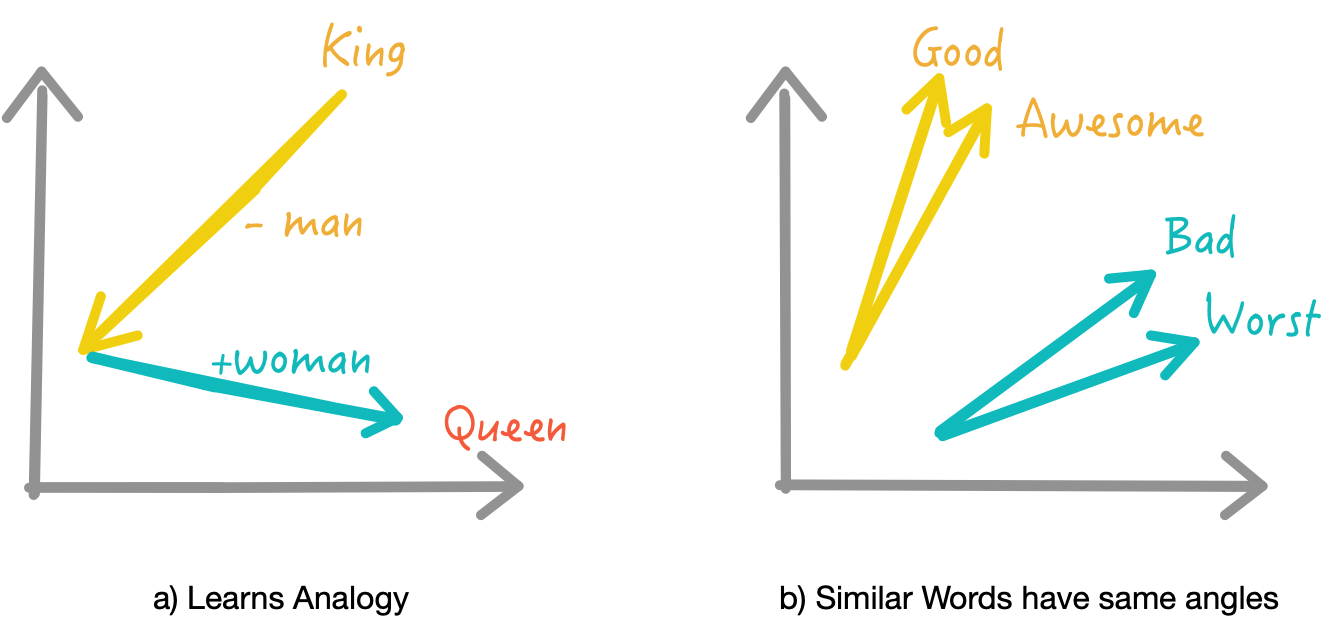

In [25]:
import tensorflow as tf
import tensorflow_hub as hub

In [26]:
module_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
model = hub.load(module_url)
print ("module %s loaded" % module_url)

module https://tfhub.dev/google/universal-sentence-encoder/4 loaded


In [28]:
model([df_sales['publicremarks'].values[house]]).numpy()

array([[-5.80095612e-02, -6.40094951e-02, -6.31454363e-02,
        -6.33947551e-02,  5.69811314e-02, -3.61915212e-03,
        -1.01476936e-02, -4.98924367e-02,  4.20082919e-02,
        -6.63305148e-02, -1.31740021e-02, -5.72551712e-02,
        -4.03283797e-02, -6.58992380e-02, -2.45972555e-02,
         6.58725649e-02, -5.01406863e-02,  6.10782653e-02,
         5.41384630e-02,  6.10712171e-02, -1.54507235e-02,
         3.66260484e-02,  6.14190921e-02, -6.16144463e-02,
        -4.71086055e-03,  3.29235406e-03,  5.72015271e-02,
        -4.77276668e-02,  5.88600636e-02,  3.83478887e-02,
        -6.13563135e-02, -1.38539951e-02,  1.27439657e-02,
        -3.39816101e-02, -1.56563837e-02,  2.31139455e-02,
         6.55803755e-02,  6.55224323e-02, -6.54502288e-02,
         5.24116270e-02,  4.80403081e-02,  5.11404164e-02,
         6.54920936e-02, -3.18787992e-02, -6.60096332e-02,
        -6.50260746e-02,  4.42826785e-02, -2.86432598e-02,
        -3.31025980e-02, -4.30169590e-02, -6.03242554e-0

In [31]:
np.inner(model([df_sales['publicremarks'].values[501]]).numpy(),model([df_sales['publicremarks'].values[100]]).numpy())

array([[0.7315221]], dtype=float32)

In [69]:
def plot_similarity(labels, features, rotation):
    corr = np.inner(features, features)
    sns.set(font_scale=1.2)
    g = sns.heatmap(
      corr,
      xticklabels=labels,
      yticklabels=labels,
      vmin=0,
      vmax=1,
      cmap="YlOrRd")
    #g.set_xticklabels(labels, rotation=rotation)
    g.set_title("Semantic Textual Similarity")

def run_and_plot(messages_):
    message_embeddings_ = model(messages_)
    plot_similarity([' ' for x in range(len(messages))], message_embeddings_, 90)

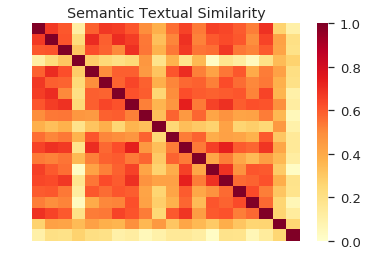

In [70]:
messages = list(df_sales.head(20)['publicremarks'])

run_and_plot(messages)

In [73]:
np.inner(model([df_sales['publicremarks'].values[20]]).numpy(),model([df_sales['publicremarks'].values[1]]).numpy())

array([[0.5257698]], dtype=float32)

In [78]:
np.inner(model([df_sales['publicremarks'].values[0]]).numpy(),model([df_sales['publicremarks'].values[3]]).numpy())

array([[0.12054136]], dtype=float32)

In [79]:
df_sales['publicremarks'].values[0]

'Welcome to this gorgeous basement home in the desired Braselton community of Riverstone Park. Upon entry, you find the formal dining room and office complete with french doors. The open floor plan boasts a kitchen with large island & breakfast area overlooking the living room with an open staircase to the 2nd floor. Master on Main AND Master Suite upstairs along with walk-in closets in every bedroom! Wind down your day on the screened in back porch as you gaze into the well manicured back lawn. This meticulously cared for home has a lot to offer, and is waiting for you! Riverstone Park is a social neighborhood with many activities during the year. It also has access to the Life Path so you are just an easy Golf Cart Ride away from your favorite eateries!'

In [80]:
df_sales['publicremarks'].values[3]

'New carpet , new vinyl, new interior paint, new stove/oven. Fenced in backyard, storage building.'

### 5. Sentence composition

In [83]:

words_types = ['Nouns', 'Verbs', 'Adjectives', 'Adverbs', 'Prepositions', 'Modal', 'PersonalP']

TAGs = [['NN','NNS','NNP','NNPS'],['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ'], ['JJ', 'JJR', 'JJS'], 
       ['RB', 'RBR', 'RBS'], ['IN'], ['MD'], ['PRP']]

In [91]:
from textblob import TextBlob
from collections import Counter
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize

In [92]:
def count_word_types(strtext, TAGs):

    textblob_temp = TextBlob(strtext)
    count= Counter([j for i,j in pos_tag(word_tokenize(strtext))])
    
    total_words = len(textblob_temp.words)
    #print(total_words)
    count_list = []
    for listt in TAGs:
        class_counter = 0
        for item in listt:
            class_counter += count[item]
        count_list.append(class_counter/total_words*100.)
   
    count_list.append(total_words)
    count_list.append(len(textblob_temp.np_counts))
    
    return count_list

In [93]:
count_word_types(df_sales['clean_publicremarks'].values[house],TAGs)

[58.620689655172406,
 18.39080459770115,
 19.54022988505747,
 1.1494252873563218,
 1.1494252873563218,
 1.1494252873563218,
 0.0,
 87,
 19]

### 6. NGRAM generation and histograms

In [94]:
from nlp_pandas_functions import ngram_analysis
reload(ngram_analysis)
dir(ngram_analysis)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'bigrams_join',
 'count_n_grams',
 'defaultdict',
 'df_get_n_grams_count',
 'df_lambda_ngram',
 'generate_n_grams',
 'get_imp',
 'get_n_grams_count',
 'get_n_grams_probability',
 'kg',
 'ngrams',
 'np',
 'pd',
 'text']

In [95]:
ngram_analysis.get_n_grams_count(df_sales['clean_publicremarks_nopunct'].values[0],3)

,0,1
0,welcome gorgeous basement,1
1,gorgeous basement home,1
2,basement home desired,1
3,home desired braselton,1
4,desired braselton community,1
...,...,...
73,easy golf cart,1
74,golf cart ride,1
75,cart ride away,1
76,ride away favorite,1


In [97]:
ngram_analysis.get_n_grams_count(df_sales['clean_publicremarks_lemmatized'].values[0],3)

,0,1
0,welcome gorgeous basement,1
1,gorgeous basement home,1
2,basement home desired,1
3,home desired braselton,1
4,desired braselton community,1
...,...,...
73,easy golf cart,1
74,golf cart ride,1
75,cart ride away,1
76,ride away favorite,1


In [98]:
ngram_analysis.get_n_grams_count(df_sales['clean_publicremarks_stemmed'].values[0],3)

,0,1
0,welcom gorgeou basement,1
1,gorgeou basement home,1
2,basement home desir,1
3,home desir braselton,1
4,desir braselton commun,1
...,...,...
73,easi golf cart,1
74,golf cart ride,1
75,cart ride away,1
76,ride away favorit,1


### 7. Noun sentences

In [99]:

from nlp_pandas_functions import noun_sentences

reload(noun_sentences)
#dir(ngram_analysis)

module https://tfhub.dev/google/universal-sentence-encoder/4 loaded
module https://tfhub.dev/google/universal-sentence-encoder/4 loaded


<module 'nlp_pandas_functions.noun_sentences' from '/home/cdsw/nlp_pandas_functions/noun_sentences.py'>

In [104]:
df_sales.head(1)['clean_publicremarks_additional_words'].values

array(['gorgeous basement desired braselton community riverstone park. entry, find formal dining room office complete french doors. open floor plan boasts kitchen large island & breakfast area overlooking living room open staircase digitnd floor. master main master suite upstairs walk-in closets bedroom! wind day screened porch gaze manicured lawn. meticulously cared lot offer, waiting you! riverstone park social neighborhood activities year. access life path easy golf cart ride favorite eateries!'],
      dtype=object)

In [100]:
result = noun_sentences.df_column_noun_sentences(df_sales.head(1), 'clean_publicremarks', 'avmerror', 'ListingPrice', 
                                                 'Transprice', 'avmValue')

In [101]:
result

(defaultdict(int,
             {'gorgeous basement home': 1,
              'braselton community riverstone park': 1,
              'room office': 1,
              'complete french doors': 1,
              'open floor plan boasts kitchen': 1,
              'large island': 1,
              'breakfast area': 1,
              'open staircase digitnd floor': 1,
              'main master suite': 1,
              'walk-in closets': 1,
              'porch gaze': 1,
              'riverstone park': 1,
              'social neighborhood': 1,
              'activities year': 1,
              'access life path': 1,
              'easy golf cart': 1,
              'favorite eateries': 1}),
 defaultdict(int,
             {'gorgeous basement home': -0.13084281337047354,
              'braselton community riverstone park': -0.13084281337047354,
              'room office': -0.13084281337047354,
              'complete french doors': -0.13084281337047354,
              'open floor plan boasts kitchen